In [1]:
## toy dataset for classification of patient with breast cancer diagnosis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [3]:
orig = pd.read_csv('../Datasets/wisconsin_breast_cancer.csv')

print(orig.shape)
orig.head()

(569, 33)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
orig.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
df = orig.copy()

target = df.diagnosis

target = target.map({'M': 1, 'B': 0})

df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'], inplace=True)

print(df.shape)

(569, 30)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df, target,
                                                    test_size=0.2, random_state=1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


## Base Performance

In [8]:
rfc_1 = RandomForestClassifier(n_estimators=300, random_state=1)
rfc_1.fit(x_train, y_train)

print("Base Random Forest training mean accuracy: %.4f" % rfc_1.score(x_train, y_train))
print("Base Random Forest test mean accuracy: %.4f" % rfc_1.score(x_test, y_test))

Base Random Forest training mean accuracy: 1.0000
Base Random Forest test mean accuracy: 0.9561


## SelectFromModel Performance

In [9]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 300))
sel.fit(x_train, y_train)

sel.get_support()

array([False, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
        True, False, False])

In [10]:
x_train_sel = x_train.iloc[:, sel.get_support()]
x_test_sel = x_test.iloc[:, sel.get_support()]

print(x_train_sel.shape, x_test_sel.shape)

(455, 10) (114, 10)


In [11]:
rfc_2 = RandomForestClassifier(n_estimators=300, random_state=1)
rfc_2.fit(x_train_sel, y_train)

print("Modified Random Forest training mean accuracy: %.4f" % rfc_2.score(x_train_sel, y_train))
print("Modified Random Forest test mean accuracy: %.4f" % rfc_2.score(x_test_sel, y_test))

Modified Random Forest training mean accuracy: 1.0000
Modified Random Forest test mean accuracy: 0.9474


## Confusion Matrix

In [12]:
y_pred = rfc_2.predict(x_test_sel)

y_pred[:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [13]:
confusion_matrix(y_test, y_pred)

array([[71,  1],
       [ 5, 37]], dtype=int64)

[[71  1]
 [ 5 37]]


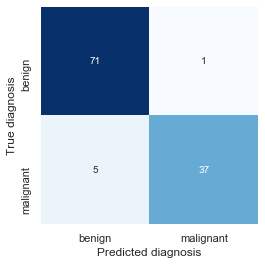

In [26]:
original_matrix = confusion_matrix(y_test, y_pred)
diagnosis_names = ['benign', 'malignant']
matdf = pd.DataFrame(original_matrix,
                     index=diagnosis_names, columns=diagnosis_names)

print(original_matrix)

sns.heatmap(matdf, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel ('Predicted diagnosis')
plt.ylabel('True diagnosis');

In [27]:
>>> tn, fp, fn, tp = original_matrix.ravel()
>>> (tn, fp, fn, tp)

(71, 1, 5, 37)